<a href="https://colab.research.google.com/github/XTWLP/CNN/blob/master/%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB%20%E5%AE%8C%E5%85%A8%E4%BB%A3%E7%A0%81%2092%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchvision.transforms import ToPILImage
show = ToPILImage() #可以将Tensor转成Image，方便可视化

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset = tv.datasets.CIFAR10(root='/home/cy/data/',
                               train=True,
                               download=True,
                               transform=transform)
trainloader = t.utils.data.DataLoader(trainset,
                                      batch_size=4,
                                      shuffle=True,
                                      num_workers=2)
testset = tv.datasets.CIFAR10(root='/home/cy/data/',
                              train=False,
                              download=True,
                              transform=transform)
testloader = t.utils.data.DataLoader(trainset,
                                      batch_size=4,
                                      shuffle=False,
                                      num_workers=2)
classes = ('plane','car','bird','cat',
           'deer','dog','frog','house','ship','truck')

Extracting /home/cy/data/cifar-10-python.tar.gz to /home/cy/data/
Files already downloaded and verified


In [3]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /home/cy/data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

ship


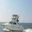

In [4]:
(data, label) = trainset[100]
print(classes[label])

show((data + 1) / 2)

        frog         dog        frog       house


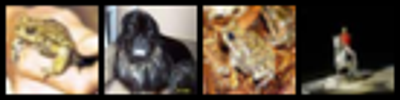

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(''.join('%12s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(x.size()[0],-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9,nesterov=True)

In [8]:
for epoch in range(20):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = Variable(inputs), Variable(labels)
    device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
    inputs, labels = data[0].to(device), data[1].to(device)
    
    net.to(device)
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.data
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f'\
            %(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
print('Finshed Training')

[1,  2000] loss: 2.229
[1,  4000] loss: 1.857
[1,  6000] loss: 1.678
[1,  8000] loss: 1.564
[1, 10000] loss: 1.524
[1, 12000] loss: 1.451
[2,  2000] loss: 1.406
[2,  4000] loss: 1.373
[2,  6000] loss: 1.323
[2,  8000] loss: 1.294
[2, 10000] loss: 1.305
[2, 12000] loss: 1.252
[3,  2000] loss: 1.193
[3,  4000] loss: 1.203
[3,  6000] loss: 1.192
[3,  8000] loss: 1.180
[3, 10000] loss: 1.166
[3, 12000] loss: 1.181
[4,  2000] loss: 1.094
[4,  4000] loss: 1.120
[4,  6000] loss: 1.093
[4,  8000] loss: 1.113
[4, 10000] loss: 1.110
[4, 12000] loss: 1.080
[5,  2000] loss: 0.991
[5,  4000] loss: 1.015
[5,  6000] loss: 1.036
[5,  8000] loss: 1.045
[5, 10000] loss: 1.051
[5, 12000] loss: 1.045
[6,  2000] loss: 0.944
[6,  4000] loss: 0.965
[6,  6000] loss: 0.995
[6,  8000] loss: 0.978
[6, 10000] loss: 0.999
[6, 12000] loss: 0.986
[7,  2000] loss: 0.900
[7,  4000] loss: 0.908
[7,  6000] loss: 0.937
[7,  8000] loss: 0.943
[7, 10000] loss: 0.948
[7, 12000] loss: 0.955
[8,  2000] loss: 0.841
[8,  4000] 

In [9]:
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)

In [10]:
for epoch in range(21):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = Variable(inputs), Variable(labels)
    device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
    inputs, labels = data[0].to(device), data[1].to(device)
    
    net.to(device)
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.data
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f'\
            %(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
print('Finshed Training')

[1,  2000] loss: 0.727
[1,  4000] loss: 0.780
[1,  6000] loss: 0.782
[1,  8000] loss: 0.788
[1, 10000] loss: 0.786
[1, 12000] loss: 0.792
[2,  2000] loss: 0.612
[2,  4000] loss: 0.642
[2,  6000] loss: 0.668
[2,  8000] loss: 0.683
[2, 10000] loss: 0.708
[2, 12000] loss: 0.703
[3,  2000] loss: 0.562
[3,  4000] loss: 0.595
[3,  6000] loss: 0.620
[3,  8000] loss: 0.639
[3, 10000] loss: 0.655
[3, 12000] loss: 0.655
[4,  2000] loss: 0.501
[4,  4000] loss: 0.557
[4,  6000] loss: 0.586
[4,  8000] loss: 0.630
[4, 10000] loss: 0.600
[4, 12000] loss: 0.619
[5,  2000] loss: 0.478
[5,  4000] loss: 0.527
[5,  6000] loss: 0.556
[5,  8000] loss: 0.560
[5, 10000] loss: 0.572
[5, 12000] loss: 0.621
[6,  2000] loss: 0.461
[6,  4000] loss: 0.488
[6,  6000] loss: 0.558
[6,  8000] loss: 0.560
[6, 10000] loss: 0.561
[6, 12000] loss: 0.564
[7,  2000] loss: 0.435
[7,  4000] loss: 0.466
[7,  6000] loss: 0.497
[7,  8000] loss: 0.507
[7, 10000] loss: 0.527
[7, 12000] loss: 0.565
[8,  2000] loss: 0.409
[8,  4000] 

In [14]:
for epoch in range(5):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = Variable(inputs), Variable(labels)
    device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
    inputs, labels = data[0].to(device), data[1].to(device)
    
    net.to(device)
    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.data
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f'\
            %(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
print('Finshed Training')

[1,  2000] loss: 0.231
[1,  4000] loss: 0.259
[1,  6000] loss: 0.273
[1,  8000] loss: 0.307
[1, 10000] loss: 0.317
[1, 12000] loss: 0.339
[2,  2000] loss: 0.209
[2,  4000] loss: 0.254
[2,  6000] loss: 0.307
[2,  8000] loss: 0.285
[2, 10000] loss: 0.329
[2, 12000] loss: 0.343
[3,  2000] loss: 0.225
[3,  4000] loss: 0.238
[3,  6000] loss: 0.278
[3,  8000] loss: 0.287
[3, 10000] loss: 0.296
[3, 12000] loss: 0.330
[4,  2000] loss: 0.223
[4,  4000] loss: 0.232
[4,  6000] loss: 0.257
[4,  8000] loss: 0.255
[4, 10000] loss: 0.303
[4, 12000] loss: 0.311
[5,  2000] loss: 0.212
[5,  4000] loss: 0.217
[5,  6000] loss: 0.233
[5,  8000] loss: 0.272
[5, 10000] loss: 0.274
[5, 12000] loss: 0.310
Finshed Training


实际的label：     frog   truck   truck    deer


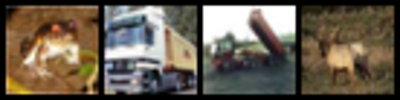

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('实际的label：',''.join(\
                          '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images/2 + 0.5)).resize((400,100))

In [16]:
outputs = net(images.to(device))

_, pridected = t.max(outputs.cpu().data, 1)

print('预测结果：',''.join(' %5s'\
                      %classes[pridected[j]] for j in range(4)))

预测结果：   frog truck truck  deer


In [17]:
correct = 0.0
total = 0.0
for data in testloader:
  images, labels = data
  outputs = net(images.to(device))
  _,predicteds = t.max(outputs.cpu().data, 1)
  total += labels.size(0)
  correct += (predicteds == labels).sum()

print('准确率：%d %%' %(100*correct/total))

准确率：92 %
